# Support Vector Machine
### Q1) classify the Size_Categorie using SVM.

## ANSWER:

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor


import matplotlib.pyplot as plt
#from pandas.tools.plotting import scatter_matrix


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler


In [3]:
import numpy
seed = 7
numpy.random.seed(seed)

In [4]:
# Get the data
dataframe = pd.read_csv("forestfires.csv")

In [5]:
#Let's check head
dataframe.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
#Encode the data
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)

In [7]:
print("Head:", dataframe.head())

Head:    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0     

In [8]:
print("Statistical Description:", dataframe.describe())

Statistical Description:             month         day        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     7.475822    4.259188   90.644681  110.872340  547.940039    9.021663   
std      2.275990    2.072929    5.520111   64.046482  248.066192    4.559477   
min      1.000000    1.000000   18.700000    1.100000    7.900000    0.000000   
25%      7.000000    2.000000   90.200000   68.600000  437.700000    6.500000   
50%      8.000000    5.000000   91.600000  108.300000  664.200000    8.400000   
75%      9.000000    6.000000   92.900000  142.400000  713.900000   10.800000   
max     12.000000    7.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain  ...    monthdec  \
count  517.000000  517.000000  517.000000  517.000000  ...  517.000000   
mean    18.889168   44.288201    4.017602    0.021663  ...    0.017408   
std      5.806625   16.

In [9]:
print("Shape:", dataframe.shape)

Shape: (517, 31)


In [10]:
print("Data Types:", dataframe.dtypes)

Data Types: month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object


In [11]:
print("Correlation:", dataframe.corr(method='pearson'))

Correlation:              month       day      FFMC       DMC        DC       ISI  \
month     1.000000 -0.050837  0.291477  0.466645  0.868698  0.186597   
day      -0.050837  1.000000 -0.041068  0.062870  0.000105  0.032909   
FFMC      0.291477 -0.041068  1.000000  0.382619  0.330512  0.531805   
DMC       0.466645  0.062870  0.382619  1.000000  0.682192  0.305128   
DC        0.868698  0.000105  0.330512  0.682192  1.000000  0.229154   
ISI       0.186597  0.032909  0.531805  0.305128  0.229154  1.000000   
temp      0.368842  0.052190  0.431532  0.469594  0.496208  0.394287   
RH       -0.095280  0.092151 -0.300995  0.073795 -0.039192 -0.132517   
wind     -0.086368  0.032478 -0.028485 -0.105342 -0.203466  0.106826   
rain      0.013438 -0.048340  0.056702  0.074790  0.035861  0.067668   
area      0.056496  0.023226  0.040122  0.072994  0.049383  0.008258   
dayfri   -0.028562  0.158676  0.019306 -0.012010 -0.004220  0.046695   
daymon   -0.002941 -0.643220 -0.059396 -0.107921 -0

In [12]:
dataset = dataframe.values


X = dataset[:,0:12]
Y = dataset[:,12]


In [13]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 


C:\Users\91830\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False False False False False False False False  True  True]
Feature Ranking:  [10  1  8  9  7  6  5  4  3  2  1  1]


(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

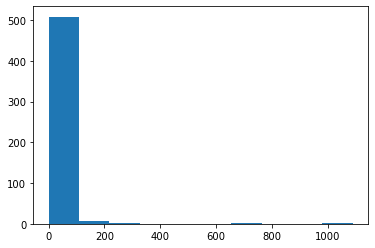

In [14]:
plt.hist((dataframe.area))

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'dayfri'}>,
        <AxesSubplot:title={'center':'daymon'}>,
        <AxesSubplot:title={'center':'daysat'}>,
        <AxesSubplot:title={'center':'daysun'}>],
       [<AxesSubplot:title={'center':'daythu'}>,
        <AxesSubplot:title={'center':'daytue'}>,
        <AxesSubplot:title={'center':'daywed'}>,
        <AxesSubplot:title={'center':'monthapr'}>,
        <AxesSubplot:title={'center':'monthaug'}>],
       [<AxesSubplot:title={'center':'mo

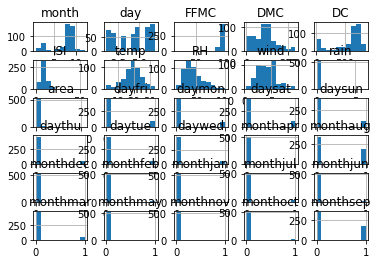

In [15]:
dataframe.hist()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

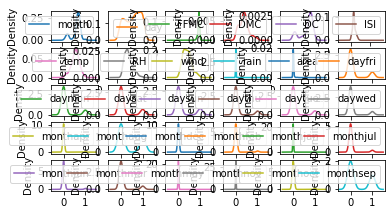

In [16]:
dataframe.plot(kind='density', subplots=True, layout=(6,6), sharex=False, sharey=False)

month          AxesSubplot(0.125,0.772143;0.110714x0.107857)
day         AxesSubplot(0.257857,0.772143;0.110714x0.107857)
FFMC        AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DMC         AxesSubplot(0.523571,0.772143;0.110714x0.107857)
DC          AxesSubplot(0.656429,0.772143;0.110714x0.107857)
ISI         AxesSubplot(0.789286,0.772143;0.110714x0.107857)
temp           AxesSubplot(0.125,0.642714;0.110714x0.107857)
RH          AxesSubplot(0.257857,0.642714;0.110714x0.107857)
wind        AxesSubplot(0.390714,0.642714;0.110714x0.107857)
rain        AxesSubplot(0.523571,0.642714;0.110714x0.107857)
area        AxesSubplot(0.656429,0.642714;0.110714x0.107857)
dayfri      AxesSubplot(0.789286,0.642714;0.110714x0.107857)
daymon         AxesSubplot(0.125,0.513286;0.110714x0.107857)
daysat      AxesSubplot(0.257857,0.513286;0.110714x0.107857)
daysun      AxesSubplot(0.390714,0.513286;0.110714x0.107857)
daythu      AxesSubplot(0.523571,0.513286;0.110714x0.107857)
daytue      AxesSubplot(

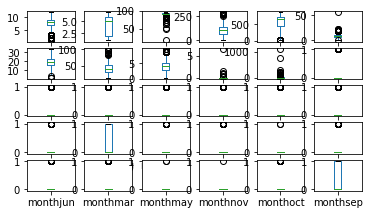

In [17]:
dataframe.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)

In [33]:
##Import necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns

In [41]:
# Get the dataset
forestfires=pd.read_csv("forestfires.csv")

In [42]:
#Let's Describe the data
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#Information about the data
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [35]:
data = forestfires.describe()

In [36]:
##Dropping the month and day columns
forestfires.drop(["month","day"],axis=1,inplace =True)


In [37]:
##Normalising the data as there is scale difference
predictors = forestfires.iloc[:,0:28]
target = forestfires.iloc[:,28]

In [38]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [39]:
fires = norm_func(predictors)

In [40]:
fires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split the data in to train dataset and test dataset

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.25, stratify = target)


### Linear Kernal.

In [44]:
#kernal==linear
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)


In [50]:
np.mean(pred_test_linear==y_test)

0.9846153846153847

### Polynomial Kernal.

In [51]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)


In [53]:
np.mean(pred_test_poly==y_test)

0.7769230769230769

### Radial Basis Function Kernel.

In [55]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)


In [56]:
np.mean(pred_test_rbf==y_test)

0.7615384615384615

### Sigmoid Kernal.

In [57]:
# Kernal = sigmoid
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train,y_train)
pred_test_sig = model_rbf.predict(x_test)


In [58]:
np.mean(pred_test_sig==y_test)

0.7615384615384615